In [21]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeClassifier
FILENAME = "troop_movements.csv"

In [22]:
data =pd.read_csv('troop_movements.csv')
print(data.head())

             timestamp  unit_id     unit_type empire_or_resistance  \
0  2024-07-11 11:39:46        1         at-at           resistance   
1  2024-07-11 11:39:45        2       unknown               empire   
2  2024-07-11 11:39:44        3         at-st           resistance   
3  2024-07-11 11:39:43        4  tie_silencer           resistance   
4  2024-07-11 11:39:42        5  tie_silencer               empire   

   location_x  location_y  destination_x  destination_y   homeworld  
0           8           8              4              4     Troiken  
1           7           9              8             10  Haruun Kal  
2           9           9              3              9    Iridonia  
3           6           9              7              9    Alderaan  
4           8           8              9             10     Iktotch  


In [23]:
emp_or_res_grouped = data.groupby('empire_or_resistance').size().reset_index(name='count')
print(emp_or_res_grouped)

  empire_or_resistance  count
0               empire    506
1           resistance    494


In [24]:
homeworld_grouped = data.groupby('homeworld').size().reset_index(name='count')
print(homeworld_grouped)

       homeworld  count
0       Alderaan     23
1    Aleen Minor     26
2     Bestine IV     18
3          Cerea     38
4       Champala     33
5      Chandrila     17
6   Concord Dawn     21
7       Corellia     24
8        Dagobah     30
9       Dathomir     18
10         Dorin     31
11        Eriadu     18
12   Glee Anselm     23
13    Haruun Kal     24
14       Iktotch     28
15      Iridonia     25
16         Kalee     30
17      Kashyyyk     25
18     Malastare     19
19        Mirial     23
20      Mon Cala     26
21    Muunilinst     21
22         Naboo     24
23          Ojom     25
24       Quermia     23
25         Rodia     25
26        Ryloth     28
27       Serenno     26
28         Shili     24
29         Skako     19
30       Socorro     13
31       Stewjon     13
32       Sullust     32
33      Tatooine     23
34       Tholoth     26
35      Toydaria     25
36     Trandosha     25
37       Troiken     19
38          Tund     21
39        Umbara     24
40       Vulpter

In [25]:
unit_type_grouped = data.groupby('unit_type').size().reset_index(name='count')
print(unit_type_grouped)

            unit_type  count
0               at-at    135
1               at-st    129
2  resistance_soldier    109
3        stormtrooper    123
4         tie_fighter    132
5        tie_silencer    132
6             unknown    122
7              x-wing    118


In [26]:
data['is_resistance'] = np.where(data['empire_or_resistance'] == 'resistance', True, False)

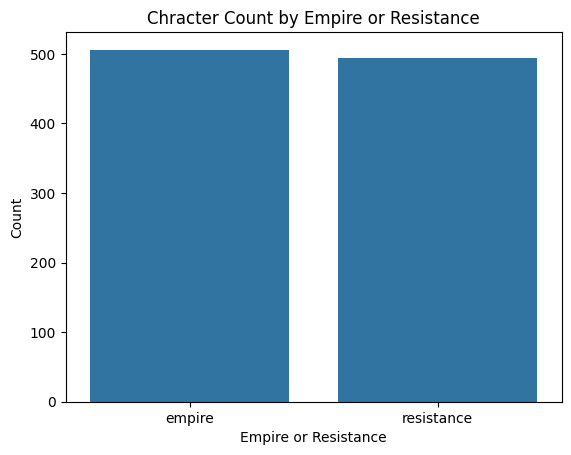

In [27]:
# Histogram
sns.barplot(x = 'empire_or_resistance',
            y = 'count',
            data = emp_or_res_grouped)
plt.title('Chracter Count by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.show()

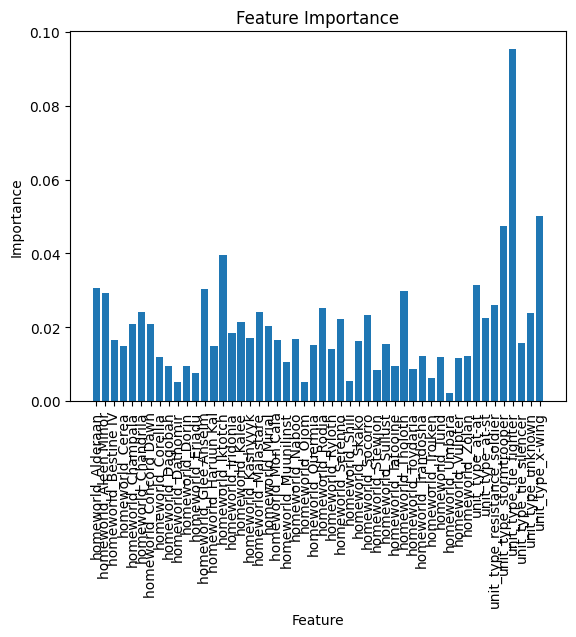

In [34]:
#Prediction Model
X = pd.get_dummies(data[['homeworld','unit_type']])
y=data['is_resistance']

decision = DecisionTreeClassifier(random_state=42)
decision.fit(X,y)

scores = decision.feature_importances_
features = X.columns

importance_dataframe = pd.DataFrame({'Feature':features,'Importance':scores})

plt.bar(importance_dataframe['Feature'],importance_dataframe['Importance'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


In [36]:
filename = "trained_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(decision, file)

In [30]:
# Read 10 Million line CSV file
FILENAME_10M = "troop_movements10m.csv"
df10m = pd.read_csv(FILENAME_10M)

In [31]:
#Clean data
#display(df10m)
#Replace invalid unit types with "unknown"
df10m['unit_type'] = df10m['unit_type'].apply(
    lambda type: "unknown" if type == "invalid_unit" else type
)

#Get rid of NaNs in location
cleaned_df = df10m.ffill()
display(cleaned_df)


,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1,1,Glee Anselm
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0,1,Trandosha
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6,1,Corellia
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6,9,Shili
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9,6,Muunilinst
...,...,...,...,...,...,...,...,...
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.0,6.0,1,3,Troiken
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.0,6.0,2,0,Kashyyyk
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.0,7.0,6,4,Kashyyyk
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.0,6.0,8,8,Kalee


In [32]:
# Save cleaned data to a Parquet file
cleaned_df.to_parquet('troop_movements10m.parquet', engine='pyarrow')